In [1]:
# General Imports
import os
from lxml import etree

from commonroad.scenario.scenario import Tag
from commonroad.common.file_writer import CommonRoadFileWriter, OverwriteExistingFile
from commonroad.planning.planning_problem import PlanningProblemSet
from commonroad.common.file_reader import CommonRoadFileReader


download map

In [11]:
from crdesigner.map_conversion.osm2cr.converter_modules.osm_operations.downloader import download_around_map, download_map
from crdesigner.map_conversion.osm2cr import config
'''
There are 2 ways to download maps:
1. Download a map around a specific point with a specific radius
download_around_map(map_name, latitude, longitude, radius)
2. Download a map with a specific bounding box
download_map(map_name, min_latitude, min_longitude, max_latitude, max_longitude)
'''
x = 19.0276
y = 47.4561
query = 'https://api.openstreetmap.org/api/0.6/map?bbox={},{},{},{}'.format(x, y, x+0.01, y+0.01)
print(query)
download_map('downtown.osm', x,y,x+0.01,y+0.01)

https://api.openstreetmap.org/api/0.6/map?bbox=19.0276,47.4561,19.0376,47.4661
downloading map
writing custom bounds


convert osm -> commonroad (.xml format)

mapillary Device ID is not set
drawing lanelet 0 of 3289
drawing lanelet 100 of 3289
drawing lanelet 200 of 3289
drawing lanelet 300 of 3289
drawing lanelet 400 of 3289
drawing lanelet 500 of 3289
drawing lanelet 600 of 3289
drawing lanelet 700 of 3289
drawing lanelet 800 of 3289
drawing lanelet 900 of 3289
drawing lanelet 1000 of 3289
drawing lanelet 1100 of 3289
drawing lanelet 1200 of 3289
drawing lanelet 1300 of 3289
drawing lanelet 1400 of 3289
drawing lanelet 1500 of 3289
drawing lanelet 1600 of 3289
drawing lanelet 1700 of 3289
drawing lanelet 1800 of 3289
drawing lanelet 1900 of 3289
drawing lanelet 2000 of 3289
drawing lanelet 2100 of 3289
drawing lanelet 2200 of 3289
drawing lanelet 2300 of 3289
drawing lanelet 2400 of 3289
drawing lanelet 2500 of 3289
drawing lanelet 2600 of 3289
drawing lanelet 2700 of 3289
drawing lanelet 2800 of 3289
drawing lanelet 2900 of 3289
drawing lanelet 3000 of 3289
drawing lanelet 3100 of 3289
drawing lanelet 3200 of 3289


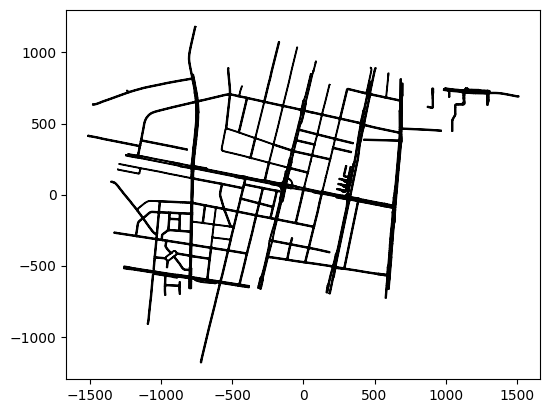

unknown intersection direction key: merge_to_left
unknown intersection direction key: slight_right
unknown intersection direction key: merge_to_left


/home/ntran4869/miniconda3/envs/autodrive/lib/python3.8/site-packages/crdesigner/map_conversion/osm2cr/converter_modules/intermediate_operations/intermediate_format/_intermediate_edge.py:82: UserWarning: Lanelet 3574 invalid
  warnings.warn("Lanelet " + str(lanelet.lanelet_id) + " invalid")


KeyboardInterrupt: 

In [3]:
import crdesigner.map_conversion.osm2cr.converter_modules.converter as converter
import crdesigner.map_conversion.osm2cr.converter_modules.cr_operations.export as ex

# open the map and convert it to a scenario
scenario = converter.GraphScenario("files/test1.osm")

# draw and show the scenario
scenario.plot()

# save the scenario as commonroad file
scenario.save_as_cr("test1.xml")

In [ ]:
input_path = "test1.xml"  # replace empty string
output_name = "lanelet_files/lanelet_test1.osm"  # replace empty string

convert commonroad -> lanelet2

In [ ]:
from crdesigner.map_conversion.map_conversion_interface import commonroad_to_lanelet

# load CommonRoad file and convert it to lanelet format
commonroad_to_lanelet(input_path, output_name)

In [ ]:
def extract_nd_refs(file_path):
    # Parse the XML file
    tree = etree.parse(file_path)
    root = tree.getroot()

    remove_IDs = []
    # Iterate through each way element, delete the way if it has a nd element with ref='None'
    for way in root.findall('way'):
        for nd in way.findall('nd'):
            ref = nd.get('ref')
            if ref == 'None':
                print("way_id: ", way.get('id'))
                remove_IDs.append(way.get('id'))
                root.remove(way)
                break
    
    for relation in root.findall('relation'):
        for member in relation.findall('member'):
            ref = member.get('ref')
            if ref in remove_IDs:
                print("relation_id: ", relation.get('id'))
                root.remove(relation)
                break
    
    # Write the modified XML to a new file
    tree.write('check.osm', encoding="utf-8", xml_declaration=True)
                

# Example usage
input_file = "lanelet_files/lanelet_test1.osm"
way_nd_refs = extract_nd_refs(input_file)


way_id:  92417
way_id:  92681
way_id:  92693
way_id:  92699
relation_id:  92418
relation_id:  92682
relation_id:  92694
relation_id:  92700


way_id:  92417


TypeError: Argument 'element' has incorrect type (expected lxml.etree._Element, got str)